# EEP 136 Project 1 Deliverable

**Group John Graunt**

Introduction: We are Team Graunt, with members:
1. Guilherme Hoher - guilherme_hoher@berkeley.edu 
2. Xiaolong Wang - justinwx@berkeley.edu & https://github.com/Justinwxl
3. Shrija Malla - shrija@berkeley.edu & https://github.com/shrija-malla
4. Steven Zeng - k1519632@berkeley.edu & https://github.com/zengsteven

## Topics & Goals:

Our project focused on analyzing recent population trends in Saudi Arabia. In particular, we focused on migration and work patterns.

Our project goals included:
1. Better understanding possible socioeconomic and cultural reasons for migration in the region.
2. Analyzing relationships between other growing interests in the region and migration.

## Collaboration:

We collaborated using the following tools:

1. Google Docs for general asynchronous updates and planning
2. Deepnote for collaborative coding
3. Datahub for compiling the code to send off to Github

## Code

In [72]:
##Installing Data and Tools
%pip install wbdata
%pip install chart-studio
%pip install --upgrade pip
%matplotlib notebook
%matplotlib inline
import wbdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Deliverable 1: Population Statistics

Inspiration from a previous project 1 from John Gaunt and support from ChatGPT.

In [63]:
import pandas as pd
import requests

def get_country_code(country_name):
    """
    Convert country name -> World Bank ISO3 country code.
    """
    url = "https://api.worldbank.org/v2/country?format=json&per_page=300"
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    
    for country in data[1]:
        if country["name"].strip().lower() == country_name.strip().lower():
            return country["id"]
    
    return None

def get_age_distribution(country_code, year):
    """
    Mock function to return age distribution percentages for a given country and year.
    This should ideally be replaced with real data from a reliable demographic source.
    """
    age_distributions = {
        "WLD": {0: 8, 5: 8, 10: 9, 15: 9, 20: 8, 25: 8, 30: 7, 35: 7,
                 40: 6, 45: 6, 50: 5, 55: 5, 60: 4, 65: 4, 70: 3, 75: 2,
                 80: 2, 85: 1},
        "USA": {0: 6, 5: 6, 10: 7, 15: 7, 20: 7, 25: 7, 30: 6, 35: 6,
                 40: 6, 45: 6, 50: 6, 55: 5, 60: 5, 65: 4, 70: 3, 75: 3,
                 80: 2, 85: 2}
    }
    return age_distributions.get(country_code, age_distributions["WLD"])

def estimate_population_in_age_range(total_population, age_range, age_distribution):
    """
    Estimate the population within the specified age range based on the age distribution.
    """
    lower, upper = age_range
    total_percentage = sum(v for k, v in age_distribution.items() if lower <= k <= upper)
    return int((total_percentage / 100) * total_population)

def population(year, sex, age_range, location):
    """
    Get the estimated population of a given country (or the world) based on year, sex, and age range.
    Returns a formatted string with the result.
    """
    
    sex = sex.lower().strip()
    sex_indicators = {
        "people": "SP.POP.TOTL", "p": "SP.POP.TOTL", "all": "SP.POP.TOTL", "everyone": "SP.POP.TOTL",
        "male": "SP.POP.TOTL.MA.IN", "males": "SP.POP.TOTL.MA.IN", "m": "SP.POP.TOTL.MA.IN", "ma": "SP.POP.TOTL.MA.IN",
        "female": "SP.POP.TOTL.FE.IN", "females": "SP.POP.TOTL.FE.IN", "f": "SP.POP.TOTL.FE.IN", "fe": "SP.POP.TOTL.FE.IN"
    }
    
    indicator = sex_indicators.get(sex, None)
    if indicator is None:
        return None
    
    if location.strip().lower() in ["world", "wld"]:
        country_code = "WLD"
        location_name = "the world"
    elif location.strip().lower() == "usa":
        country_code = "USA"
        location_name = "the United States"
    else:
        country_code = get_country_code(location)
        location_name = location
    
    if not country_code:
        return None
    
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}?date={year}&format=json"
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    
    total_population = data[1][0].get("value", None)
    if total_population is None:
        return None
    
    age_distribution = get_age_distribution(country_code, year)
    estimated_population = estimate_population_in_age_range(total_population, age_range, age_distribution)

    sex_label = "people" if sex in ["p", "people", "everyone", "all"] else "males" if sex.startswith("m") else "females"
    lower, upper = age_range

    return f"In {year}, {estimated_population:,} {sex_label} aged {lower} to {upper} were living in {location_name}."

# Example queries:
print(population(2002, "p", [0, 4], "China"))
print(population(2020, "females", [10, 19], "United States"))
print(population(2023, "everyone", [20, 29], "WLD"))
print(population(2023, "everyone", [65, 85], "USA"))
print(population(1975, "People", [5, 7], "Rwanda"))

In 2002, 102,432,000 people aged 0 to 4 were living in China.
In 2020, 23,071,238 females aged 10 to 19 were living in United States.
In 2023, 1,289,900,160 people aged 20 to 29 were living in the world.
In 2023, 46,888,085 people aged 65 to 85 were living in the United States.
In 1975, 368,618 people aged 5 to 7 were living in Rwanda.


# Deliverable 2: Unit Testing

In [64]:
##UNIT TESTING
##Unit Test for each function

In [65]:
##Test will pass if it returns true 
result = population(2002, "p", [0, 100], "China")
population_amount = int(result.split()[2].replace(",", ""))  #get population
print("True" if population_amount < 3024320000 else "Population wrong") ##there's less than 3billion ppl in china in 2002 

True


# Deliverable 3: Population DF

Population breakdown function returns population data for multiple countries and years, segmented by age buckets (0-4, 5-9, 10-14...) and by sex as Make or Female. Data slicing put in place to segment pandas DF output into single countries, years, or age ranges.

In [66]:
def population_breakdown(country, year):
    if isinstance(country, str):
        country = [country]
    mydict = {}
    ages = ["0004", "0509", "1014", "1519", "2024", "2529", "3034", "3539", "4044", "4549", "5054", "5559", "6064", "6569", "7074", "7579", "80UP"]
    mfs = ["MA", "FE"]
    for age in ages:
        for mf in mfs:
            mydict["SP.POP." + age + "." + mf] = "Ages from: " + age[0:2] + " to " + age[2:4] + ", Sex:" + mf
    variable_labels = mydict
    world = wbdata.get_dataframe(variable_labels, country=country, parse_dates=False)
    if isinstance(year, int):
        if isinstance(world.index, pd.MultiIndex):
            world.index = world.index.set_levels(world.index.levels[1].astype(int), level=1)
            world = world.sort_index()
            return world.loc[pd.IndexSlice[:, year], :]
        else:
            return world.loc[str(year)].to_frame().T
    elif isinstance(year, (list, tuple)) and len(year) == 2:
        start, end = year
        if isinstance(world.index, pd.MultiIndex):
            world.index = world.index.set_levels(world.index.levels[1].astype(int), level=1)
            world = world.sort_index()
            return world.loc[pd.IndexSlice[:, start:end], :]
        else:
            world.index = world.index.astype(int)
            world = world.sort_index()
            return world.loc[start:end]

df = population_breakdown(["SAU","WLD"], [2021, 2023])

row = df.loc[("Saudi Arabia", 2022)]

country_data = df.xs("Saudi Arabia", level=0)

year_data = df.xs(2022, level=1)

column = df["Ages from: 00 to 04, Sex:MA"]

df

Ages from: 00 to 04, Sex:MA  Ages from: 00 to 04, Sex:FE  \
country      date                                                             
Saudi Arabia 2021                    1338260.0                    1288007.0   
             2022                    1332951.0                    1282020.0   
             2023                    1333324.0                    1279886.0   
World        2021                  345189042.0                  326599774.0   
             2022                  339582664.0                  321831779.0   
             2023                  334765288.0                  317720103.0   

                   Ages from: 05 to 09, Sex:MA  Ages from: 05 to 09, Sex:FE  \
country      date                                                             
Saudi Arabia 2021                    1368825.0                    1315098.0   
             2022                    1403004.0                    1350516.0   
             2023                    1408136.0                    1357176.0   
World        2021                  355703002.0                  334286684.0   
             2022                  355425122.0                  334457151.0   
             2023                  353677898.0                  333286965.0   

                   Ages from: 10 to 14, Sex:MA  Ages from: 10 to 14, Sex:FE  \
country      date                                                             
Saudi Arabia 2021                    1246922.0                    1202549.0   
             2022                    1305949.0                    1254991.0   
             2023                    1347854.0                    1289467.0   
World        2021                  344122479.0                  322405880.0   
             2022                  347895623.0                  325923635.0   
             2023                  350908323.0                  328854130.0   

                   Ages from: 15 to 19, Sex:MA  Ages from: 15 to 19, Sex:FE  \
country      date                                                             
Saudi Arabia 2021                    1083420.0                    1037470.0   
             2022                    1155021.0                    1104753.0   
             2023                    1212291.0                    1159295.0   
World        2021                  324017775.0                  304485535.0   
             2022                  327019295.0                  307283141.0   
             2023                  330734289.0                  310627065.0   

                   Ages from: 20 to 24, Sex:MA  Ages from: 20 to 24, Sex:FE  \
country      date                                                             
Saudi Arabia 2021                    1422529.0                    1016048.0   
             2022                    1486845.0                    1064004.0   
             2023                    1453171.0                    1100386.0   
World        2021                  312601224.0                  294298208.0   
             2022                  314174911.0                  295926471.0   
             2023                  315810689.0                  297607203.0   

                   ...  Ages from: 60 to 64, Sex:MA  \
country      date  ...                                
Saudi Arabia 2021  ...                     375467.0   
             2022  ...                     405762.0   
             2023  ...                     448387.0   
World        2021  ...                  154831165.0   
             2022  ...                  156823861.0   
             2023  ...                  162420898.0   

                   Ages from: 60 to 64, Sex:FE  Ages from: 65 to 69, Sex:MA  \
country      date                                                             
Saudi Arabia 2021                     232347.0                     183333.0   
             2022                     252960.0                     202753.0   
             2023                     271267.0                     230572.0   
World        2021 

# Deliverable 4: Population Pyramid

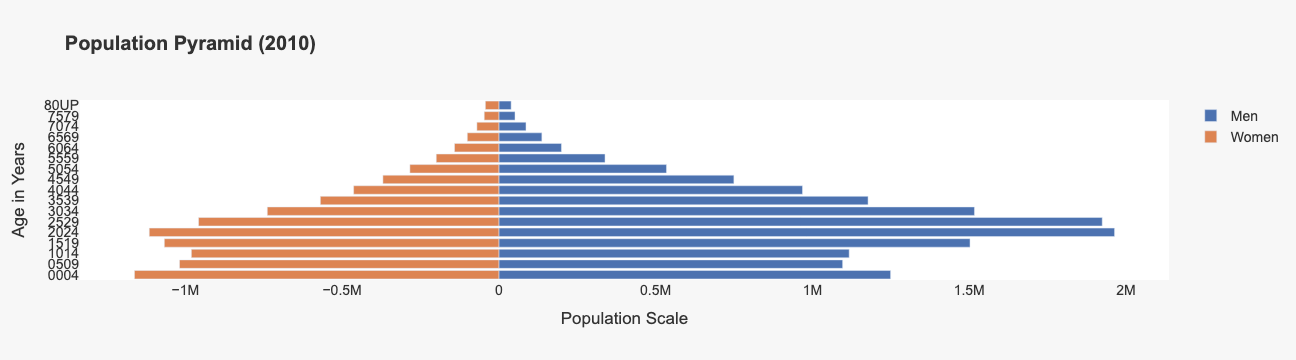

In [67]:
import plotly.graph_objects as go
import plotly.offline as pyo
import wbdata
import pandas as pd

# Initialize Plotly for offline mode
pyo.init_notebook_mode(connected=True)

# Define age ranges
age_ranges = [f"{i:02d}{i+4:02d}" for i in range(0, 80, 5)] + ["80UP"]

# Define World Bank API variables
variables = {
    **{f"SP.POP.{age}.MA": f"Males {age}" for age in age_ranges},
    **{f"SP.POP.{age}.FE": f"Females {age}" for age in age_ranges}
}

def population_pyramid(df, yr):
    if str(yr) not in df.index:
        return "Please pick a year that is within your dataframe."

    # Define gender data
    males = df.loc[str(yr)].filter(like="Male").values
    females = -df.loc[str(yr)].filter(like="Female").values  # Negative for mirrored effect

    # Define y-axis labels (centered age range)
    y_vals = [int(s[:2]) + 2 for s in age_ranges]

    # Create figure
    fig = go.Figure()

    # Add Male Bars
    fig.add_trace(go.Bar(x=males, y=y_vals, orientation='h', name='Men',
                         marker=dict(color='#4C72B0'), hoverinfo='x+y'))

    # Add Female Bars
    fig.add_trace(go.Bar(x=females, y=y_vals, orientation='h', name='Women',
                         marker=dict(color='#DD8452'), hoverinfo='x+y'))

    # Update layout for aesthetics
    fig.update_layout(
        title=f"<b>Population Pyramid ({yr})</b>",
        xaxis=dict(title="Population Scale", showgrid=True, zeroline=False),
        yaxis=dict(title="Age in Years", tickvals=y_vals, ticktext=age_ranges, showgrid=True),
        barmode='overlay',
        paper_bgcolor="#F7F7F7",  # Light background
        plot_bgcolor="#FFFFFF",   # White plot background
        font=dict(family="Arial, sans-serif", size=14, color="#333333"),
        showlegend=True
    )

    # Show plot
    pyo.iplot(fig)

# Fetch data
sau_df = wbdata.get_dataframe(variables, country="SAU")

# Plot for 2010
population_pyramid(sau_df, '2010')

# Deliverable 5: Animated Population Pyramid for Saudi Arabia

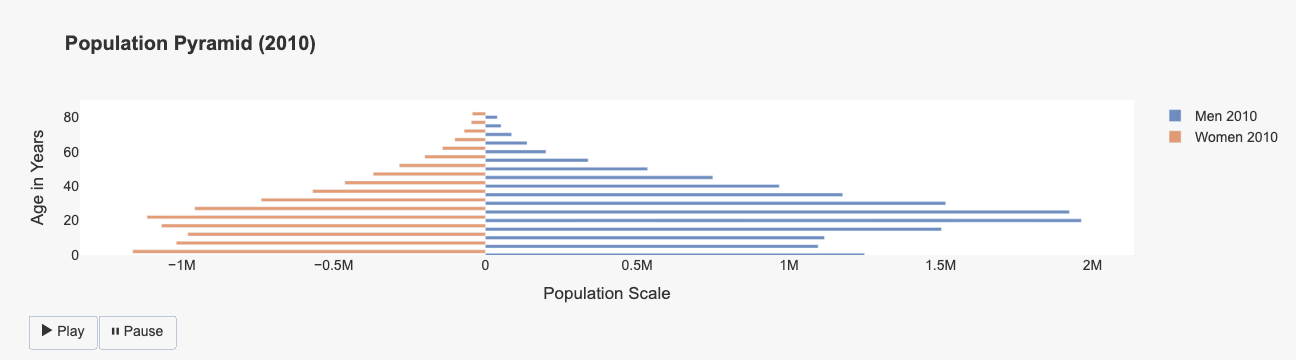

In [68]:
def animated_population_pyramid(df, years):
    years = [str(year) for year in years if str(year) in df.index]
    if not years:
        return "Please ensure all selected years are within your dataframe."

    def get_bars(year):
        """Returns bars for a given year (Men & Women)."""
        return [
            go.Bar(x=df.loc[year].filter(like="Male").values, 
                   y=[int(s[:2])+1 for s in age_ranges],
                   orientation='h', name=f'Men {year}',
                   marker=dict(color='#4C72B0'), opacity=0.8),
            
            go.Bar(x=-df.loc[year].filter(like="Female").values, 
                   y=[int(s[:2])+1 for s in age_ranges],
                   orientation='h', name=f'Women {year}',
                   marker=dict(color='#DD8452'), opacity=0.8)
        ]

    # Create figure with first year's data
    fig = go.Figure(
        data=get_bars(years[0]),
        layout=go.Layout(
            title=f"<b>Population Pyramid ({years[0]})</b>",
            xaxis=dict(title="Population Scale", showgrid=True, zeroline=False),
            yaxis=dict(title="Age in Years", range=[0, 90], showgrid=True),
            paper_bgcolor="#F7F7F7",  # Light background
            plot_bgcolor="#FFFFFF",   # White plot background
            font=dict(family="Arial, sans-serif", size=14, color="#333333"),
            updatemenus=[{
                "buttons": [
                    {"args": [None, {"frame": {"duration": 1500, "redraw": True}, "fromcurrent": True}],
                     "label": "▶ Play", "method": "animate"},
                    {"args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate",
                                       "transition": {"duration": 0}}],
                     "label": "⏸ Pause", "method": "animate"}
                ],
                "direction": "left", "pad": {"r": 10, "t": 60},
                "showactive": False, "type": "buttons", "x": 0.1, "xanchor": "right", "y": 0, "yanchor": "top"
            }]
        )
    )

    # Add animation frames
    fig.frames = [go.Frame(data=get_bars(year), name=year) for year in years]

    # Display the animated plot
    pyo.iplot(fig)

# Example function call
animated_population_pyramid(sau_df, range(2010, 1960, -20))


# Deliverable 7: Other Visualization Tools

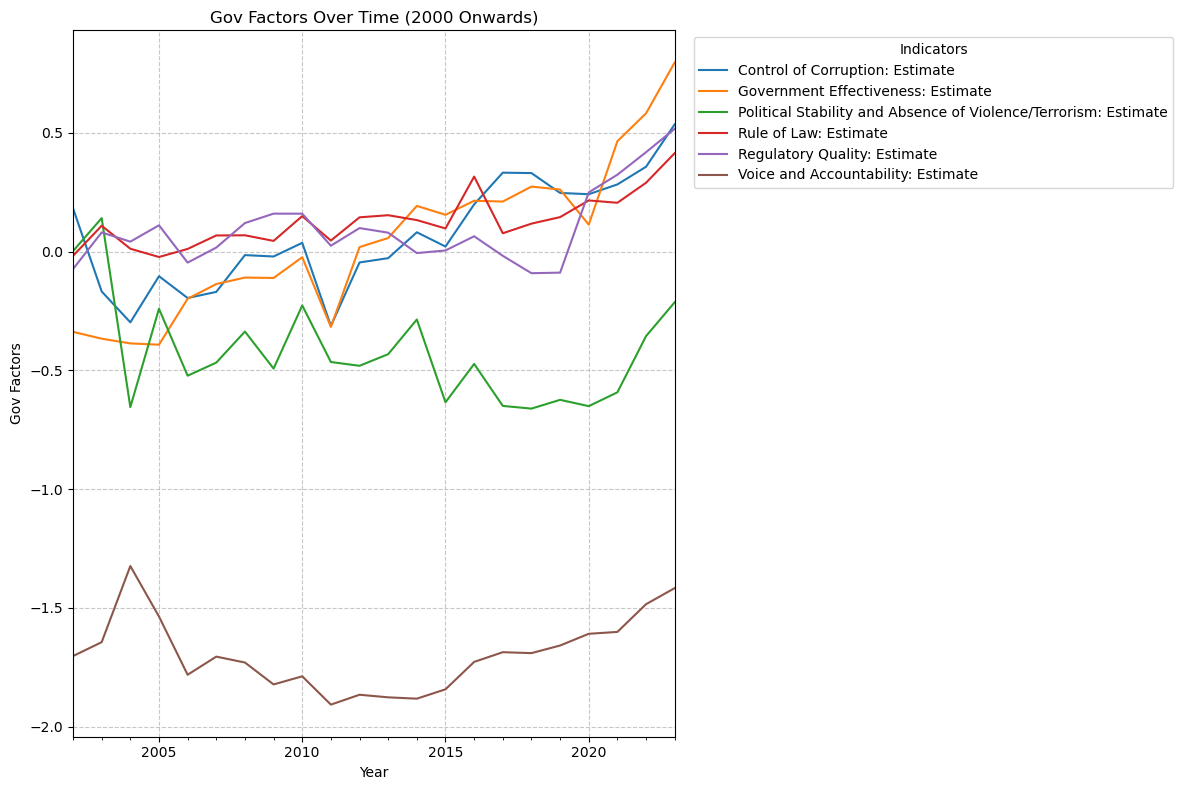

In [71]:
##Plot Looking at Governance Factors of Saudi Arabia

SOURCE = 3 # "Worldwide Governance Indicators"
governance_variables = {
    "CC.EST": "Control of Corruption: Estimate",
    "GE.EST": "Government Effectiveness: Estimate",
    "PV.EST": "Political Stability and Absence of Violence/Terrorism: Estimate",
    "RL.EST": "Rule of Law: Estimate",
    "RQ.EST": "Regulatory Quality: Estimate",
    "VA.EST": "Voice and Accountability: Estimate"}
gov = wbdata.get_dataframe(governance_variables, country="SAU",parse_dates=True)
gov.dropna()
gov_filtered = gov[gov.index.year >= 2002]

#plot
ax = gov_filtered.plot(
    figsize=(12, 8),
    title="Gov Factors Over Time (2000 Onwards)",
    xlabel="Year",
    ylabel="Gov Factors",
    grid=True,)
plt.legend(title="Indicators", loc="upper left", bbox_to_anchor=(1.02, 1), fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Things to note from the graph:
1. Steady growth in almost every variable since 2020 -- what's happening?
2. Major decrease in 'Voice and Accountability + Political Stability in 2004--what happened? 

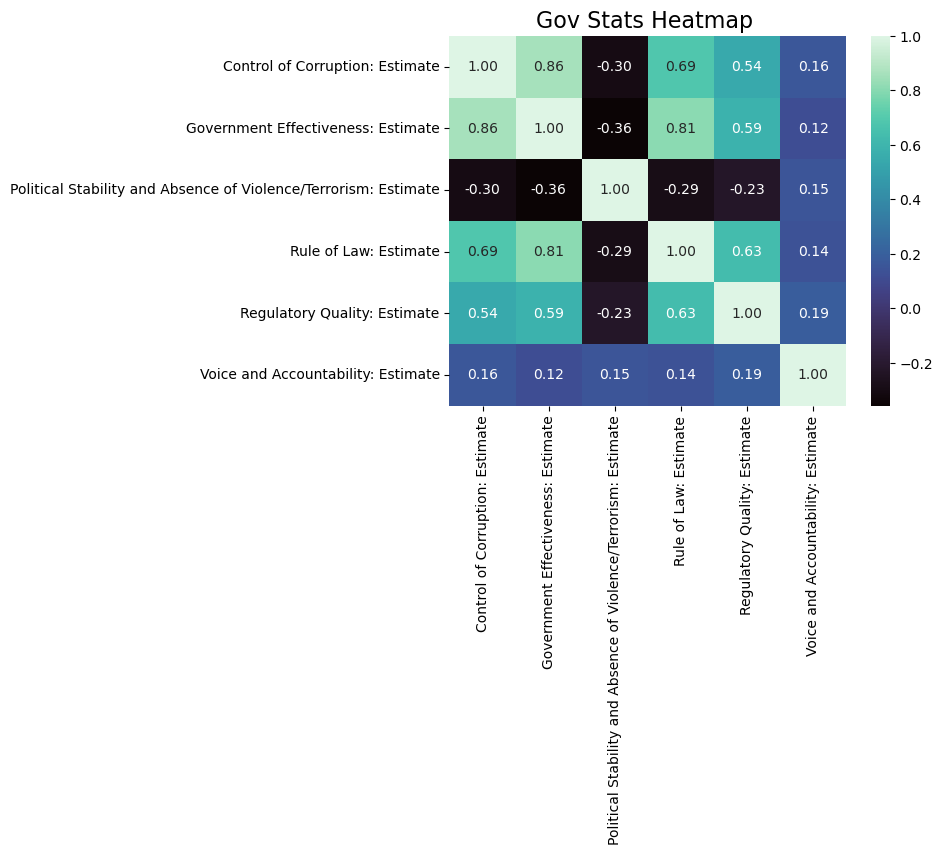

In [70]:
#Heat Map of Governance Factors of Saudi Arabia
sns.heatmap(gov.corr(), annot=True, fmt=".2f", cmap="mako", cbar=True)
plt.title("Gov Stats Heatmap ", fontsize=16)
plt.show()

Couple things to note:
1. Strong relation between control of corruption, gov effectiveness, rule of law, and regulatory quality
2. Implies something about gov framework?

# Deliverable 8: Agricultural Supply

**Saudi Arabia's Population & Agricultural Production**

Saudi Arabia's economic and social development is intertwined with its evolving population dynamics and agricultural production. This presentation explores the historical interplay of these factors, analyzing government policies, technological advancements, and the implications for the nation's future.


**Saudization Policy**


The Saudization policy, also known as the Nitaqat program, aimed to prioritize local employment over foreign workers. This initiative, initiated in 2011, significantly reshaped the Saudi labor force, impacting industries heavily reliant on migrant labor, including agriculture.


**Vision 2030 & Economic Diversification**

Vision 2030, launched in 2016, focuses on economic diversification, shifting away from oil dependence toward sectors like tourism, technology, and non-oil industries. This economic transformation influences migration patterns, population demographics, and the government's agricultural investments.


**Impact of Expatriate Labor Policies**

Saudi Arabia's approach to expatriate labor has undergone significant transformation, particularly affecting the agricultural sector.


1. **Traditional Labor Structure**: Heavy reliance on expatriate workforce in low-wage sectors, creating a diverse but dependent agricultural labor market.

2. **Policy Evolution**: Implementation of stricter labor laws and expatriate fees, significantly influencing farm labor availability and costs.

3. **Current Transformation**: Strategic shift towards skilled worker recruitment and local employment, balancing labor diversity with economic efficiency in agriculture.


**Historical Shifts in Agricultural Policy**

1. **Wheat Subsidy & Water Crisis**: The government heavily subsidized wheat farming from the 1970s to 2008, making Saudi Arabia a top producer. However, this led to severe groundwater depletion.

2. **Food Security Strategies**: In response to the water crisis, the government reduced wheat production and increased reliance on imports. Saudi Arabia also invested in farmland abroad to secure its food supply.


3. **Smart & Sustainable Agriculture**: Recent investments in hydroponics, desalination-based farming, and vertical farms aim to address climate challenges and
promote sustainable agriculture.

**Impact of Historical Events**

1. **Pre-1938: Early Settlements & Traditional Agriculture**

Traditional oasis farming and small-scale irrigation systems sustained limited agricultural output. Nomadic Bedouin populations primarily relied on
livestock and trade.


2. **1938: Oil Discovery & Urbanization**

The discovery of oil transformed Saudi Arabia, shifting focus from an agrarian economy to an oil- driven urban economy. Massive urbanization led to rural-to-urban migration and a decline in traditional farming.



4. **1960s-1970s: Arab-Israeli Conflicts & Food Security**


Middle Eastern conflicts disrupted regional trade, leading to increased food security concerns. Saudi Arabia prioritized self-sufficiency policies during the
Cold War era.


6. **1990-1991: Gulf War & Migration Changes**


The Gulf War led to the expulsion of Yemeni and Jordanian workers, affecting labor supply. A shift in labor policy resulted in a higher reliance on South Asian workers.


8. **Present Day: Climate Change & Desertification**

Historical overuse of water resources has made food production unsustainable. The government is focusing on sustainable agricultural techniques and food
imports.


**Agricultural Supply & Population Growth**

1. **Population Growth:** Saudi Arabia's population has grown rapidly, from around 4 million in 1960 to over 35 million today.



2. **Agricultural Production:** Despite government investments in irrigation projects and wheat production subsidies, the country remains heavily dependent on food imports due to its arid climate.



3. **Water Scarcity:** Limited water resources restrict sustainable food production, making agricultural expansion challenging.



4. **Urbanization & Imports:** Increasing urbanization and reliance on food imports create a system where supply must be maintained through
external trade.

**The Malthusian Perspective**

1. **Malthusian Concerns:** Thomas Malthus argued that unchecked population growth would outstrip resource availability, leading to resource scarcity and societal instability.




2. **Food Security Risks:** Malthus might argue that Saudi Arabia's rapid population growth could lead to food insecurity if imports were disrupted due to its heavy reliance on imported food.




3. **Vulnerability:** The country is susceptible to external shocks such as global supply chain disruptions, climate change, and geopolitical issues, making its food security precarious.
